- """
Here are 2 small exercises to evaluate your motivation and skills.
The first one is simply a question, and the second one is related to
applying a regression model to a dataset. The approach is at least or even
more important than the result, please detail all the steps of your research.
"""


# 1 - Data preprocessing

In [1]:
# ----------------------
# In a dataset, there is a feature named "Server/Machine Type", how would you
# transform/prepare this feature so that it can be used in a regression model
# (one only accepting float/bool as value), you don't have to code a solution,
# just write an answer on what you would do.

# Some example of values on this feature:
# Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz (x86_64), 2950 MHz, 385570 MB RAM,  12079 MB swap
# Intel(R) Xeon(R) CPU E5-2670 v2 @ 2.50GHz (x86_64), 2500 MHz,  95717 MB RAM, 149012 MB swap
# Intel(R) Xeon(R) CPU E5-2697A v4 @ 2.60GHz (x86_64), 1300 MHz, 257868 MB RAM,  12027 MB swap
# Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz (x86_64), 3138 MHz, 772642 MB RAM,   9042 MB swap
# Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz (x86_64), 2214 MHz, 385570 MB RAM,  12090 MB swap
# Core(TM) i7-6700HQ CPU @ 2.60GHz (x86_64), 2600 MHz,  40078 MB RAM,  75183 MB swap
# Intel(R) Xeon(R) CPU E5-2697A v4 @ 2.60GHz (x86_64), 1199 MHz, 257868 MB RAM,  12247 MB swap
# Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz (x86_64), 3246 MHz, 514658 MB RAM,  10770 MB swap
# Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz (x86_64), 2483 MHz, 772642 MB RAM,   8266 MB swap


# Your full text (not python) answer:

- There is no simple answer to transform this textual (non-numeric) data to float/bool value.
- One way to solve this problem is, 
    - We have one feature named "Server/Machine Type", we can transform this single feature into multiple features.
    - As we can see the value of the feature is a configuration of the "Server/Machine Type", we can break it to multiple
features like Server/Machine Name, Processor Speed (GHz), (32 or 64 bit), Processor Number(2950, 2500, 2600.. ),
RAM(385570, 95717..), Swap Memory(12079, 149012..).

    - Most of the new columns are numeric values and doesn't need to transform again. 
    - For Server/Machine Name other textual data we can handle in different ways like One Hot Encoding.
    
- Although we are increasing the dimension by transforming single feature into mulltiple features, We enable machine learning 
algorithm to comprehend them and extract the useful information.

# 2 - Regression

1. You are given a dataset (providing as additional file to this exercise) with 34 features and 1 target to predict, your task is to train a regression model on this dataset.

<br>
2. Code it in python3, provide as well a requirements.txt containing the version you use
   I should be able to run directly in my linux terminal:
   
   - pip install -r requirements.txt && python exercise_ml_internship_altair.py
   
<br>
3. You are free to use every library you think is appropriate


# 2.1 loading dataset

In [2]:
#  {python code}

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("dataset_ml_exo.csv")

# 2.2 Data preparation

In [5]:
# This dataset has already been mostly prepared (it contains only float/bool features), but you may
# still have to do pre-processing (e.g. features reduction, other...).

#  {python code}


In [6]:
df.head()

,Unnamed: 0,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,target
0,0,48.0,2020,1.0,48.0,1.0,5.00,2.0,37646.0,0.0,...,3.0,669504.0,NaN,1.0,851.0,92.0,15176,130,12,964.88
1,1,80.0,2019.1,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,...,3270.0,13198942.0,0.41,NaN,NaN,NaN,11090,60,10,21406.09
2,2,80.0,unknown,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,...,3270.0,13164180.0,0.41,NaN,NaN,NaN,11090,60,10,21294.57
3,3,80.0,2020.1,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,...,3270.0,13536085.0,0.41,NaN,NaN,NaN,11090,60,10,16173.29
4,4,80.0,2018.0.1,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,...,3270.0,13126389.0,0.41,NaN,NaN,NaN,11090,60,10,19386.01


## 2.2.1 Droping Index column

In [7]:
df['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [8]:
# drop unnamed column (Index column)
df = df.drop(['Unnamed: 0'], axis=1)

In [9]:
# display dataframe
display(df)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,target
0,48.0,2020,1.0,48.0,1.0,5.00,2.0,37646.0,0.0,0.0,...,3.0,669504.0,NaN,1.0,851.0,92.0,15176,130,12,964.88
1,80.0,2019.1,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,7656.0,...,3270.0,13198942.0,0.41,NaN,NaN,NaN,11090,60,10,21406.09
2,80.0,unknown,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,7656.0,...,3270.0,13164180.0,0.41,NaN,NaN,NaN,11090,60,10,21294.57
3,80.0,2020.1,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,7656.0,...,3270.0,13536085.0,0.41,NaN,NaN,NaN,11090,60,10,16173.29
4,80.0,2018.0.1,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,7656.0,...,3270.0,13126389.0,0.41,NaN,NaN,NaN,11090,60,10,19386.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4.0,2020,1.0,4.0,1.0,0.05,2.0,5667.0,0.0,0.0,...,6.0,239940.0,1.00,6.0,70.0,31.0,17709,520,16,190.58
4996,4.0,2020,1.0,4.0,1.0,0.05,2.0,7797.0,0.0,0.0,...,6.0,440825.0,1.00,6.0,70.0,31.0,28894,510,16,1344.99
4997,4.0,2020,1.0,4.0,1.0,0.05,2.0,10267.0,0.0,0.0,...,6.0,581660.0,1.00,6.0,71.0,31.0,28894,770,16,481.28
4998,4.0,2020,1.0,4.0,1.0,0.05,2.0,1437.0,0.0,0.0,...,6.0,59340.0,1.02,6.0,71.0,31.0,17709,520,16,465.38


- Index column dropped

## 2.2.2 Checking for duplicate records

In [10]:
# checking whether we have any duplicated rows
df.duplicated().sum()

0

- No duplicate records.

In [11]:
# Details of the dataset like number of columns, non=null count and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   5000 non-null   float64
 1   feature_1   5000 non-null   object 
 2   feature_2   5000 non-null   float64
 3   feature_3   5000 non-null   float64
 4   feature_4   5000 non-null   float64
 5   feature_5   5000 non-null   float64
 6   feature_6   5000 non-null   float64
 7   feature_7   5000 non-null   float64
 8   feature_8   5000 non-null   float64
 9   feature_9   5000 non-null   float64
 10  feature_10  5000 non-null   float64
 11  feature_11  5000 non-null   float64
 12  feature_12  5000 non-null   bool   
 13  feature_13  5000 non-null   float64
 14  feature_14  5000 non-null   float64
 15  feature_15  5000 non-null   float64
 16  feature_16  5000 non-null   bool   
 17  feature_17  5000 non-null   float64
 18  feature_18  5000 non-null   float64
 19  feature_19  5000 non-null  

- feature_1 has mixed values (int, float, 'unknown').
- Althought the column looks like it is a Date column, we will fill the unknown values with most frequently occurred value.

## 2.2.3 Handling unknown values in feature_1 column

In [12]:
# Filling the "unknown" values with most frequently occurred value.
df['feature_1'] = pd.to_numeric(df['feature_1'], errors='coerce')
df['feature_1'] = df['feature_1'].fillna(int(df.feature_1.mode()))

In [13]:
# display dataframe
display(df.head())

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,target
0,48.0,2020.0,1.0,48.0,1.0,5.00,2.0,37646.0,0.0,0.0,...,3.0,669504.0,NaN,1.0,851.0,92.0,15176,130,12,964.88
1,80.0,2019.1,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,7656.0,...,3270.0,13198942.0,0.41,NaN,NaN,NaN,11090,60,10,21406.09
2,80.0,2020.0,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,7656.0,...,3270.0,13164180.0,0.41,NaN,NaN,NaN,11090,60,10,21294.57
3,80.0,2020.1,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,7656.0,...,3270.0,13536085.0,0.41,NaN,NaN,NaN,11090,60,10,16173.29
4,80.0,2020.0,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,7656.0,...,3270.0,13126389.0,0.41,NaN,NaN,NaN,11090,60,10,19386.01


In [14]:
# Details of the dataset like number of columns and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   5000 non-null   float64
 1   feature_1   5000 non-null   float64
 2   feature_2   5000 non-null   float64
 3   feature_3   5000 non-null   float64
 4   feature_4   5000 non-null   float64
 5   feature_5   5000 non-null   float64
 6   feature_6   5000 non-null   float64
 7   feature_7   5000 non-null   float64
 8   feature_8   5000 non-null   float64
 9   feature_9   5000 non-null   float64
 10  feature_10  5000 non-null   float64
 11  feature_11  5000 non-null   float64
 12  feature_12  5000 non-null   bool   
 13  feature_13  5000 non-null   float64
 14  feature_14  5000 non-null   float64
 15  feature_15  5000 non-null   float64
 16  feature_16  5000 non-null   bool   
 17  feature_17  5000 non-null   float64
 18  feature_18  5000 non-null   float64
 19  feature_19  5000 non-null  

## 2.2.4 Filling the missing values with mean

In [15]:
# Checking for null values in all the column (features & columns)
df.isnull().sum()

feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     2
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     3
feature_27     4
feature_28    52
feature_29    52
feature_30    52
feature_31     0
feature_32     0
feature_33     0
target         0
dtype: int64

- feature_20, feature_26, feature_27, feature_28, feature_29, feature_30 has missing values which need to be filled.

In [16]:
# Filling the missing values with mean

df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.mean())

In [17]:
# Checking for null values in all the column after filling the missing values with mean
df.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
target        0
dtype: int64

- No more missing values in the dataset

## 2.2.5 Changing boolean to 0 and 1 values

In [18]:
# Making sure whether all the columns are numberic values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   5000 non-null   float64
 1   feature_1   5000 non-null   float64
 2   feature_2   5000 non-null   float64
 3   feature_3   5000 non-null   float64
 4   feature_4   5000 non-null   float64
 5   feature_5   5000 non-null   float64
 6   feature_6   5000 non-null   float64
 7   feature_7   5000 non-null   float64
 8   feature_8   5000 non-null   float64
 9   feature_9   5000 non-null   float64
 10  feature_10  5000 non-null   float64
 11  feature_11  5000 non-null   float64
 12  feature_12  5000 non-null   bool   
 13  feature_13  5000 non-null   float64
 14  feature_14  5000 non-null   float64
 15  feature_15  5000 non-null   float64
 16  feature_16  5000 non-null   bool   
 17  feature_17  5000 non-null   float64
 18  feature_18  5000 non-null   float64
 19  feature_19  5000 non-null  

- We have 2 columns (feature_12,feature_16) which are boolean and we need to convert it to numeric; 1 for True and 0 for False

In [19]:
# Changing boolean to 0 and 1 values

df['feature_12'] = df['feature_12'].astype(int)
df['feature_16'] = df['feature_16'].astype(int)

In [20]:
# Checking the dataframe again to confirm that all the columns are numberic values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   5000 non-null   float64
 1   feature_1   5000 non-null   float64
 2   feature_2   5000 non-null   float64
 3   feature_3   5000 non-null   float64
 4   feature_4   5000 non-null   float64
 5   feature_5   5000 non-null   float64
 6   feature_6   5000 non-null   float64
 7   feature_7   5000 non-null   float64
 8   feature_8   5000 non-null   float64
 9   feature_9   5000 non-null   float64
 10  feature_10  5000 non-null   float64
 11  feature_11  5000 non-null   float64
 12  feature_12  5000 non-null   int32  
 13  feature_13  5000 non-null   float64
 14  feature_14  5000 non-null   float64
 15  feature_15  5000 non-null   float64
 16  feature_16  5000 non-null   int32  
 17  feature_17  5000 non-null   float64
 18  feature_18  5000 non-null   float64
 19  feature_19  5000 non-null  

- Now all the values in the dataframe are numeric

## 2.2.6 Dropping feature_1 as the column values are not consistent and we are not performing any time series analysis

In [21]:
df = df.drop(['feature_1'], axis=1)

In [22]:
df.head()

,feature_0,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,target
0,48.0,1.0,48.0,1.0,5.00,2.0,37646.0,0.0,0.0,19.0,...,3.0,669504.0,1.011265,1.00000,851.000000,92.000000,15176,130,12,964.88
1,80.0,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,7656.0,3189.0,...,3270.0,13198942.0,0.410000,4.07215,1053.938965,137.905214,11090,60,10,21406.09
2,80.0,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,7656.0,3189.0,...,3270.0,13164180.0,0.410000,4.07215,1053.938965,137.905214,11090,60,10,21294.57
3,80.0,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,7656.0,3189.0,...,3270.0,13536085.0,0.410000,4.07215,1053.938965,137.905214,11090,60,10,16173.29
4,80.0,4.0,20.0,228.0,160.01,429.0,1367665.0,0.0,7656.0,3189.0,...,3270.0,13126389.0,0.410000,4.07215,1053.938965,137.905214,11090,60,10,19386.01


## 2.2.7 Feature Selection 

In [23]:
from sklearn import preprocessing

In [24]:
# Feature Scaling: Transform features by scaling each feature to a (0, 1) range

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)

In [25]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.478261,0.000000,0.478261,0.000000,0.019804,0.000000,0.004992,0.0,0.000000,0.002792,...,0.000000,0.023001,0.076432,0.166667,0.591794,0.419192,0.292814,0.098592,0.50,0.008915
1,0.826087,0.428571,0.173913,0.550971,0.639968,0.335428,0.186911,0.0,0.962172,0.556021,...,0.546778,0.488142,0.024284,0.678692,0.732920,0.651036,0.082173,0.000000,0.25,0.207145
2,0.826087,0.428571,0.173913,0.550971,0.639968,0.335428,0.186911,0.0,0.962172,0.556021,...,0.546778,0.486852,0.024284,0.678692,0.732920,0.651036,0.082173,0.000000,0.25,0.206063
3,0.826087,0.428571,0.173913,0.550971,0.639968,0.335428,0.186911,0.0,0.962172,0.556021,...,0.546778,0.500658,0.024284,0.678692,0.732920,0.651036,0.082173,0.000000,0.25,0.156400
4,0.826087,0.428571,0.173913,0.550971,0.639968,0.335428,0.186911,0.0,0.962172,0.556021,...,0.546778,0.485449,0.024284,0.678692,0.732920,0.651036,0.082173,0.000000,0.25,0.187555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000618,0.0,0.000000,0.000524,...,0.000502,0.007054,0.075455,1.000000,0.048679,0.111111,0.423394,0.647887,1.00,0.001406
4996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000909,0.0,0.000000,0.000524,...,0.000502,0.014512,0.075455,1.000000,0.048679,0.111111,1.000000,0.633803,1.00,0.012601
4997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001247,0.0,0.000000,0.000524,...,0.000502,0.019740,0.075455,1.000000,0.049374,0.111111,1.000000,1.000000,1.00,0.004225
4998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000039,0.0,0.000000,0.000524,...,0.000502,0.000350,0.077190,1.000000,0.049374,0.111111,0.423394,0.647887,1.00,0.004071


In [26]:
X = df_scaled.iloc[:, :-1]
y = df_scaled.iloc[:, -1]

In [27]:
X.shape

(5000, 33)

In [28]:
y.shape

(5000,)

In [29]:
# Splitting test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0) #fitting multiple regression model to the training set 

In [30]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (4000, 33)
Shape of X_test:  (1000, 33)
Shape of y_train:  (4000,)
Shape of y_test (1000,)


## Checking the correlation among the features 

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

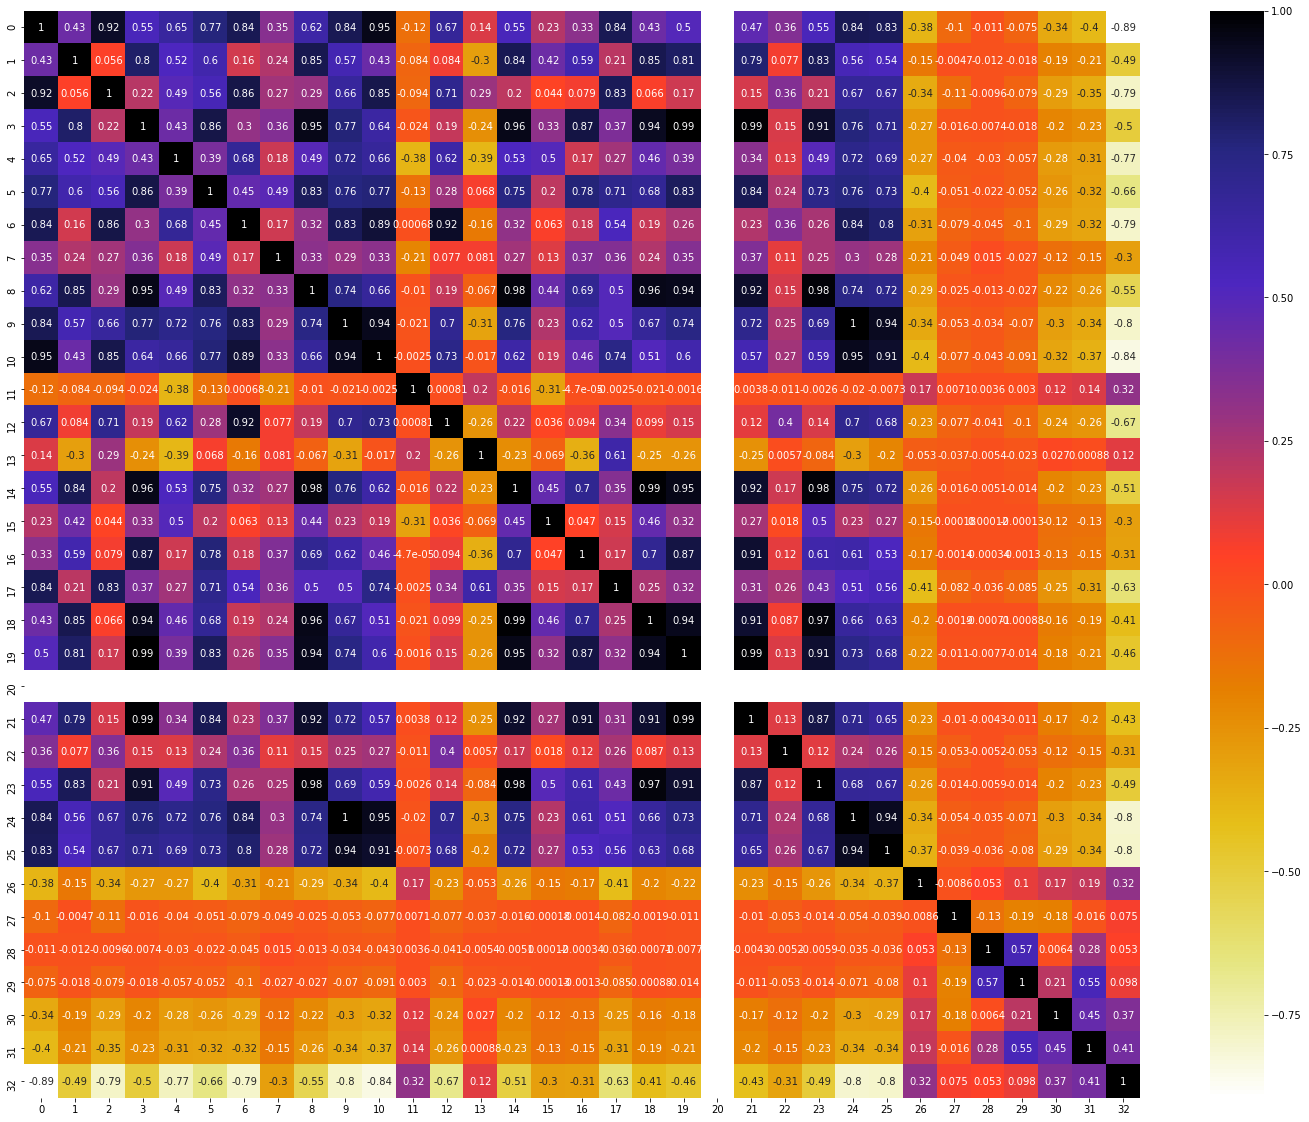

In [32]:
plt.figure(figsize=(25,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [33]:
# function to find highly correlated features

def correlation(dataset, threshold):
    """
    dataset: pass the dataset to find the correlation
    threshold: features with more than threshold value will be added to set - col_corr
    
    return: returns col_corr set contains all the features with correlation more than threshold value.
            Here absolute coeff value is taken into consideration.
    """
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(X_train, 0.89) # gets correlated features with more than .89 value
len(set(corr_features))

12

In [35]:
corr_features

{2, 8, 10, 12, 14, 18, 19, 21, 23, 24, 25, 32}

In [36]:
# dropped correlated features

X_train_dropped = X_train.drop(corr_features,axis=1)
X_test_dropped = X_test.drop(corr_features,axis=1)

In [37]:
X_train_dropped.shape

(4000, 21)

# 2.3 model training

In [38]:
#  {python code}

In [39]:
# metrics

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 2.3.1 Linear Regression

In [40]:
# Fitting the Linear Regression Model to the dataset

from sklearn.linear_model import LinearRegression

regressor_lr = LinearRegression()
regressor_lr.fit(X_train_dropped, y_train)

LinearRegression()

In [41]:
#predicting the test set results

y_pred_lr = regressor_lr.predict(X_test_dropped)

In [42]:
# calculating metrics

r2_score_lr =r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = (np.sqrt(mse_lr))

In [43]:
print('R2_score: ', r2_score_lr)
print('Mean Absolute Error: ', mae_lr)
print('Mean Squared Error: ', mse_lr)
print("RMSE: ", rmse_lr)

R2_score:  0.8925861095159677
Mean Absolute Error:  0.0032541766362050363
Mean Squared Error:  0.0002279285021868645
RMSE:  0.015097301155731924


## 2.3.2 Support Vector Regression

In [44]:
# Fitting the Support Vector Regression Model to the dataset

from sklearn.svm import SVR

regressor_svr = SVR(kernel = 'poly', gamma = 'scale')
regressor_svr.fit(X_train_dropped, y_train)

SVR(kernel='poly')

In [45]:
#predicting the test set results

y_pred_svr = regressor_svr.predict(X_test_dropped)

In [46]:
# calculating metrics

r2_score_svr =r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = (np.sqrt(mse_svr))

In [47]:
print('R2_score: ', r2_score_svr)
print('Mean Absolute Error: ', mae_svr)
print('Mean Squared Error: ', mse_svr)
print("RMSE: ", rmse_svr)

R2_score:  -0.5472282150699261
Mean Absolute Error:  0.048538792957971456
Mean Squared Error:  0.003283163918679297
RMSE:  0.057298899803393234


## 2.3.3 Decision Tree

In [48]:
# Fitting the Decision Tree Regression Model to the dataset

from sklearn.tree import DecisionTreeRegressor

regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train_dropped, y_train)

DecisionTreeRegressor(random_state=0)

In [49]:
#predicting the test set results

y_pred_dt = regressor_dt.predict(X_test_dropped)

In [50]:
# calculating metrics

r2_score_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = (np.sqrt(mse_dt))

In [51]:
print('R2_score: ', r2_score_dt)
print('Mean Absolute Error: ', mae_dt)
print('Mean Squared Error: ', mse_dt)
print("RMSE: ", rmse_dt)

R2_score:  0.7699989638579717
Mean Absolute Error:  0.0032285210294321254
Mean Squared Error:  0.0004880541188206244
RMSE:  0.022091946922365723


## 2.3.4 Random Forest

In [52]:
# Fitting the Random Forest Regression Model to the dataset

from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_rf.fit(X_train_dropped, y_train)

RandomForestRegressor(random_state=0)

In [53]:
#predicting the test set results

y_pred_rf = regressor_rf.predict(X_test_dropped)

In [54]:
# calculating metrics

r2_score_rf =r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = (np.sqrt(mse_rf))

In [55]:
print('R2_score: ', r2_score_rf)
print('Mean Absolute Error: ', mae_rf)
print('Mean Squared Error: ', mse_rf)
print("RMSE: ", rmse_rf)

R2_score:  0.8719999075086099
Mean Absolute Error:  0.0023809021093101988
Mean Squared Error:  0.00027161169965889744
RMSE:  0.016480646214845383


# 2.4 model evaluation (evaluate model perf and display metrics)

In [56]:
#  {python code}

In [57]:
# All metric appended to the list

benchmark_metrics = ['Linear Regression', 'Support Vector Regression', 
                     'Decision Tree', 'Random Forest']

In [58]:
# All model RMSE values appended to the list
RMSE_values = [rmse_lr, rmse_svr, rmse_dt, rmse_rf]

# All model MAE values appended to the list
MAE_values = [mae_lr, mae_svr, mae_dt, mae_rf]

# All model MSE values appended to the list
MSE_values = [mse_lr, mse_svr, mse_dt, mse_rf]

# All model R2_score values appended to the list
R2_score = [r2_score_lr, r2_score_svr, r2_score_dt, r2_score_rf]

### Bar graph for models Vs RMSE values

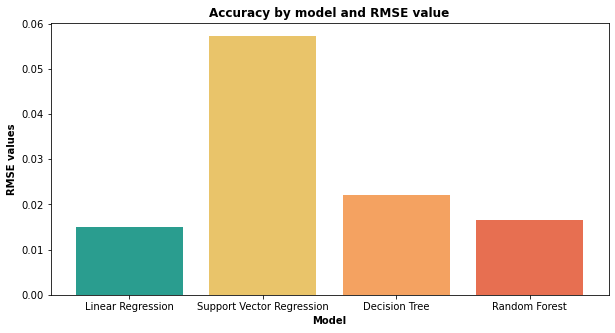

In [59]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax.bar(benchmark_metrics,RMSE_values,color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'] )
ax.set_xlabel("Model", fontweight='bold')
ax.set_ylabel("RMSE values", fontweight='bold')
ax.set_title('Accuracy by model and RMSE value', fontweight='bold')
plt.show()

### Bar graph for models Vs MSE values

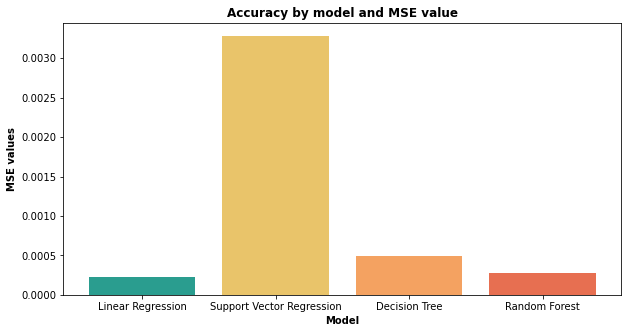

In [60]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax.bar(benchmark_metrics, MSE_values,color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'] )
ax.set_xlabel("Model", fontweight='bold')
ax.set_ylabel("MSE values", fontweight='bold')
ax.set_title('Accuracy by model and MSE value', fontweight='bold')
plt.show()

### Bar graph for models Vs MAE values

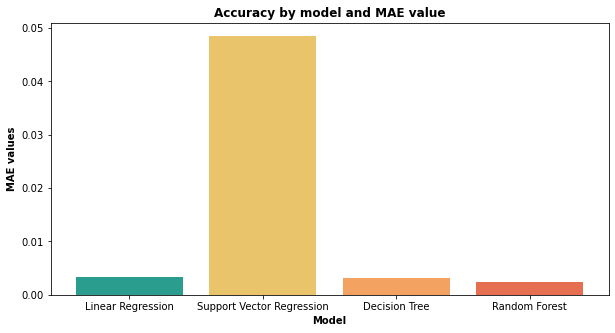

In [61]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax.bar(benchmark_metrics,MAE_values,color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'] )
ax.set_xlabel("Model", fontweight='bold')
ax.set_ylabel("MAE values", fontweight='bold')
ax.set_title('Accuracy by model and MAE value', fontweight='bold')
# plt.xticks(rotation=90)
plt.show()

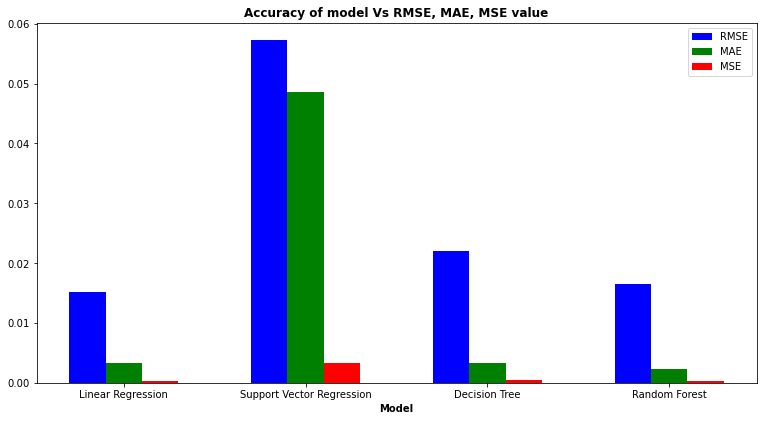

In [62]:
X = np.arange(4)
barWidth = 0.2
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, RMSE_values, color = 'b', width = 0.2, label = 'RMSE')
ax.bar(X + 0.2, MAE_values, color = 'g', width = 0.2, label = 'MAE')
ax.bar(X + 0.40, MSE_values, color = 'r', width = 0.2, label = 'MSE')
ax.set_title('Accuracy of model Vs RMSE, MAE, MSE value', fontweight='bold')

plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(benchmark_metrics))], benchmark_metrics)
plt.legend()
plt.show()

### Bar graph for models Vs R2_score values

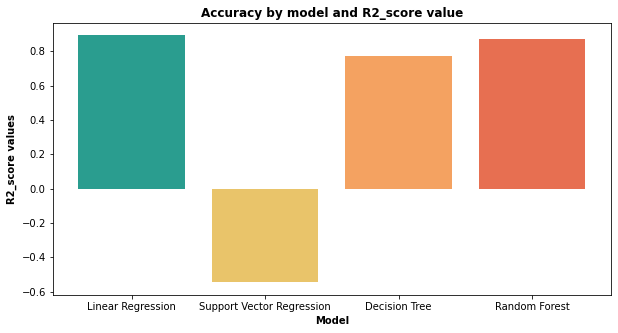

In [63]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax.bar(benchmark_metrics,R2_score,color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'] )
ax.set_xlabel("Model", fontweight='bold')
ax.set_ylabel("R2_score values", fontweight='bold')
ax.set_title('Accuracy by model and R2_score value', fontweight='bold')
# plt.xticks(rotation=90)
plt.show()

In [64]:
# Thanks !